In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.ensemble import RandomForestRegressor, IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


df = pd.read_csv("MUP_PHY_R25_P05_V20_D23_Prov.csv", low_memory=False)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 84 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0.2                      10000 non-null  int64  
 1   Unnamed: 0.1                      10000 non-null  int64  
 2   Unnamed: 0                        10000 non-null  int64  
 3   Rndrng_NPI                        10000 non-null  int64  
 4   Rndrng_Prvdr_Last_Org_Name        10000 non-null  object 
 5   Rndrng_Prvdr_First_Name           9504 non-null   object 
 6   Rndrng_Prvdr_MI                   6295 non-null   object 
 7   Rndrng_Prvdr_Crdntls              8670 non-null   object 
 8   Rndrng_Prvdr_Ent_Cd               10000 non-null  object 
 9   Rndrng_Prvdr_St1                  10000 non-null  object 
 10  Rndrng_Prvdr_St2                  2063 non-null   object 
 11  Rndrng_Prvdr_City                 10000 non-null  object 
 12  Rndrn

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Rndrng_NPI,Rndrng_Prvdr_Last_Org_Name,Rndrng_Prvdr_First_Name,Rndrng_Prvdr_MI,Rndrng_Prvdr_Crdntls,Rndrng_Prvdr_Ent_Cd,Rndrng_Prvdr_St1,...,Bene_CC_PH_Diabetes_V2_Pct,Bene_CC_PH_HF_NonIHD_V2_Pct,Bene_CC_PH_Hyperlipidemia_V2_Pct,Bene_CC_PH_Hypertension_V2_Pct,Bene_CC_PH_IschemicHeart_V2_Pct,Bene_CC_PH_Osteoporosis_V2_Pct,Bene_CC_PH_Parkinson_V2_Pct,Bene_CC_PH_Arthritis_V2_Pct,Bene_CC_PH_Stroke_TIA_V2_Pct,Bene_Avg_Risk_Scre
0,1608,8923,5179,1417145525,Slomowitz,Larry,J,DPM,I,1240 S Westlake Blvd,...,31.0,18.0,75.0,75.0,36.0,24.0,4.0,60.0,11.0,1.3313
1,1542,9172,5788,1831284892,Mehta,Praful,R,M.D.,I,6100 Bandera Rd,...,64.0,52.0,75.0,75.0,56.0,NaN,NaN,75.0,33.0,3.0384
2,5585,4111,9561,1891776308,Young,Stanford,R,MD,I,3705 Medical Pkwy,...,38.0,NaN,75.0,74.0,36.0,NaN,0.0,55.0,NaN,1.7491
3,862,3965,1093,1164501680,Schorn,Elizabeth,NaN,PT,I,6605 Nicollet Ave,...,NaN,0.0,65.0,62.0,NaN,NaN,0.0,71.0,0.0,0.7636
4,9431,1570,3258,1851896153,Vanwieren,Tsarina,R,DO,I,1836 South Ave,...,NaN,NaN,49.0,49.0,NaN,NaN,NaN,NaN,NaN,1.8063


In [348]:
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage().sum() / 1024**2:.2f} MB")
print(f"Data types:\n{df.dtypes.value_counts()}")

Dataset shape: (10000, 84)
Memory usage: 6.41 MB
Data types:
float64    61
object     15
int64       8
Name: count, dtype: int64


In [350]:
# Display basic info
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"Missing Values: {df.isnull().sum().sum():,}")
print(f"Duplicate Rows: {df.duplicated().sum():,}")

Total Rows: 10,000
Total Columns: 84
Missing Values: 196,822
Duplicate Rows: 0


In [352]:
# Show column names
print(f"\nColumns: {list(df.columns)}")
    


Columns: ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name', 'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2', 'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA', 'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type', 'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt', 'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind', 'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs', 'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt', 'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds', 'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg', 'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt', 'Bene_Avg_Age', 'Bene_Age_LT_65_Cnt', 'Bene_Age_65_74_Cnt', 'Bene_Age_75_84_Cnt', 'Bene_Age_GT_84_Cnt

In [354]:
cleaned_df = df.copy("MUP_PHY_R25_P05_V20_D23_Prov.csv")

In [356]:
print("Available columns in your dataset:")
for i, col in enumerate(cleaned_df.columns, 1):
    print(f"  {i:2d}. {col}")

Available columns in your dataset:
   1. Unnamed: 0.2
   2. Unnamed: 0.1
   3. Unnamed: 0
   4. Rndrng_NPI
   5. Rndrng_Prvdr_Last_Org_Name
   6. Rndrng_Prvdr_First_Name
   7. Rndrng_Prvdr_MI
   8. Rndrng_Prvdr_Crdntls
   9. Rndrng_Prvdr_Ent_Cd
  10. Rndrng_Prvdr_St1
  11. Rndrng_Prvdr_St2
  12. Rndrng_Prvdr_City
  13. Rndrng_Prvdr_State_Abrvtn
  14. Rndrng_Prvdr_State_FIPS
  15. Rndrng_Prvdr_Zip5
  16. Rndrng_Prvdr_RUCA
  17. Rndrng_Prvdr_RUCA_Desc
  18. Rndrng_Prvdr_Cntry
  19. Rndrng_Prvdr_Type
  20. Rndrng_Prvdr_Mdcr_Prtcptg_Ind
  21. Tot_HCPCS_Cds
  22. Tot_Benes
  23. Tot_Srvcs
  24. Tot_Sbmtd_Chrg
  25. Tot_Mdcr_Alowd_Amt
  26. Tot_Mdcr_Pymt_Amt
  27. Tot_Mdcr_Stdzd_Amt
  28. Drug_Sprsn_Ind
  29. Drug_Tot_HCPCS_Cds
  30. Drug_Tot_Benes
  31. Drug_Tot_Srvcs
  32. Drug_Sbmtd_Chrg
  33. Drug_Mdcr_Alowd_Amt
  34. Drug_Mdcr_Pymt_Amt
  35. Drug_Mdcr_Stdzd_Amt
  36. Med_Sprsn_Ind
  37. Med_Tot_HCPCS_Cds
  38. Med_Tot_Benes
  39. Med_Tot_Srvcs
  40. Med_Sbmtd_Chrg
  41. Med_Mdcr_Alowd_A

In [358]:
def add_rcm_metrics_direct(df):
    """
    Add RCM performance metrics using original Medicare column names
    
    Usage:
    df_with_metrics = add_rcm_metrics_direct(df)
    """
    print("Creating RCM performance metrics using original columns...")

In [360]:
# RCM Performance Metrics
df_with_metrics = add_rcm_metrics_direct(df)

Creating RCM performance metrics using original columns...


In [362]:
df_with_metrics = df.copy()

# Check what columns you have
print("Available columns:", df_with_metrics.columns.tolist())

# Then you can proceed with your RCM calculations
print("DataFrame shape:", df_with_metrics.shape)

Available columns: ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name', 'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2', 'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA', 'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type', 'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt', 'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind', 'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs', 'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt', 'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds', 'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg', 'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt', 'Bene_Avg_Age', 'Bene_Age_LT_65_Cnt', 'Bene_Age_65_74_Cnt', 'Bene_Age_75_84_Cnt', 'Bene_Age_

In [364]:
# First, check if your DataFrame exists and has data
print("DataFrame shape:", df_with_metrics.shape)
print("DataFrame columns:", df_with_metrics.columns.tolist())

DataFrame shape: (10000, 84)
DataFrame columns: ['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Rndrng_NPI', 'Rndrng_Prvdr_Last_Org_Name', 'Rndrng_Prvdr_First_Name', 'Rndrng_Prvdr_MI', 'Rndrng_Prvdr_Crdntls', 'Rndrng_Prvdr_Ent_Cd', 'Rndrng_Prvdr_St1', 'Rndrng_Prvdr_St2', 'Rndrng_Prvdr_City', 'Rndrng_Prvdr_State_Abrvtn', 'Rndrng_Prvdr_State_FIPS', 'Rndrng_Prvdr_Zip5', 'Rndrng_Prvdr_RUCA', 'Rndrng_Prvdr_RUCA_Desc', 'Rndrng_Prvdr_Cntry', 'Rndrng_Prvdr_Type', 'Rndrng_Prvdr_Mdcr_Prtcptg_Ind', 'Tot_HCPCS_Cds', 'Tot_Benes', 'Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt', 'Tot_Mdcr_Pymt_Amt', 'Tot_Mdcr_Stdzd_Amt', 'Drug_Sprsn_Ind', 'Drug_Tot_HCPCS_Cds', 'Drug_Tot_Benes', 'Drug_Tot_Srvcs', 'Drug_Sbmtd_Chrg', 'Drug_Mdcr_Alowd_Amt', 'Drug_Mdcr_Pymt_Amt', 'Drug_Mdcr_Stdzd_Amt', 'Med_Sprsn_Ind', 'Med_Tot_HCPCS_Cds', 'Med_Tot_Benes', 'Med_Tot_Srvcs', 'Med_Sbmtd_Chrg', 'Med_Mdcr_Alowd_Amt', 'Med_Mdcr_Pymt_Amt', 'Med_Mdcr_Stdzd_Amt', 'Bene_Avg_Age', 'Bene_Age_LT_65_Cnt', 'Bene_Age_65_74_Cnt', 'Be

In [366]:
# Calculate RCM metrics using ORIGINAL column names

# 1. Payment Rate (how much we got vs what we billed)
# Ensure columns are numeric
df_with_metrics['Tot_Mdcr_Pymt_Amt'] = pd.to_numeric(df_with_metrics['Tot_Mdcr_Pymt_Amt'], errors='coerce')
df_with_metrics['Tot_Sbmtd_Chrg'] = pd.to_numeric(df_with_metrics['Tot_Sbmtd_Chrg'], errors='coerce')
    
# Calculate payment rate with proper handling
df_with_metrics['Payment_Rate'] = np.where(
    (df_with_metrics['Tot_Sbmtd_Chrg'] > 0) & (df_with_metrics['Tot_Sbmtd_Chrg'].notna()),
    df_with_metrics['Tot_Mdcr_Pymt_Amt'] / df_with_metrics['Tot_Sbmtd_Chrg'],
    0
)
    
print("Payment Rate successfully calculated!")
print("Values:")
print(df_with_metrics[['Tot_Mdcr_Pymt_Amt', 'Tot_Sbmtd_Chrg', 'Payment_Rate']].head(10))

Payment Rate successfully calculated!
Values:
   Tot_Mdcr_Pymt_Amt  Tot_Sbmtd_Chrg  Payment_Rate
0          136889.97       266708.00      0.513258
1           43953.30        68401.00      0.642583
2            4099.56        74510.70      0.055020
3           21998.35        70750.00      0.310931
4            7890.00        29413.00      0.268249
5           42662.25       278340.00      0.153274
6          248462.51      1081212.45      0.229800
7           37415.55        71631.00      0.522337
8           25086.72        42815.00      0.585933
9           11432.92        31239.40      0.365978


In [368]:
# 2. Allowed Rate (how much Medicare approved vs what we billed)
df_with_metrics['Allowed_Rate'] = np.where(
    df_with_metrics['Tot_Sbmtd_Chrg'] > 0,
    df_with_metrics['Tot_Mdcr_Alowd_Amt'] / df_with_metrics['Tot_Sbmtd_Chrg'],
    0
)

# Add these lines to see the output:
print("Allowed Rate calculation completed!")
print("\nAllowed Rate statistics:")
print(df_with_metrics['Allowed_Rate'].describe())

print("\nSample of Allowed Rate calculations:")
print(df_with_metrics[['Tot_Sbmtd_Chrg', 'Tot_Mdcr_Alowd_Amt', 'Allowed_Rate']].head(10))

print(f"\nNumber of records with Allowed Rate > 0: {(df_with_metrics['Allowed_Rate'] > 0).sum()}")
print(f"Average Allowed Rate: {df_with_metrics['Allowed_Rate'].mean():.4f}")

Allowed Rate calculation completed!

Allowed Rate statistics:
count    10000.000000
mean         0.397489
std          0.218818
min          0.003592
25%          0.239815
50%          0.361857
75%          0.514669
max          0.990020
Name: Allowed_Rate, dtype: float64

Sample of Allowed Rate calculations:
   Tot_Sbmtd_Chrg  Tot_Mdcr_Alowd_Amt  Allowed_Rate
0       266708.00           192690.50      0.722477
1        68401.00            55189.37      0.806850
2        74510.70             5177.53      0.069487
3        70750.00            29274.01      0.413767
4        29413.00            10710.80      0.364152
5       278340.00            56669.97      0.203600
6      1081212.45           325555.96      0.301103
7        71631.00            59059.93      0.824502
8        42815.00            31976.95      0.746863
9        31239.40            14502.06      0.464223

Number of records with Allowed Rate > 0: 10000
Average Allowed Rate: 0.3975


In [370]:
# 3. Payment Efficiency (how much we collected vs what was allowed)
df_with_metrics['Payment_Efficiency'] = np.where(
    df_with_metrics['Tot_Mdcr_Alowd_Amt'] > 0,  # Fixed column name
    df_with_metrics['Tot_Mdcr_Pymt_Amt'] / df_with_metrics['Tot_Mdcr_Alowd_Amt'],
    0
)

# Display the results
print("Payment Efficiency calculation completed!")
print("\nPayment Efficiency statistics:")
print(df_with_metrics['Payment_Efficiency'].describe())

print("\nSample of Payment Efficiency calculations:")
print(df_with_metrics[['Tot_Mdcr_Alowd_Amt', 'Tot_Mdcr_Pymt_Amt', 'Payment_Efficiency']].head(10))

print(f"\nNumber of records with Payment Efficiency > 0: {(df_with_metrics['Payment_Efficiency'] > 0).sum()}")
print(f"Average Payment Efficiency: {df_with_metrics['Payment_Efficiency'].mean():.4f}")
print(f"Records with 100% efficiency (Payment_Efficiency = 1.0): {(df_with_metrics['Payment_Efficiency'] == 1.0).sum()}")

Payment Efficiency calculation completed!

Payment Efficiency statistics:
count    10000.000000
mean         0.768144
std          0.073793
min          0.173948
25%          0.740363
50%          0.774667
75%          0.794611
max          1.000000
Name: Payment_Efficiency, dtype: float64

Sample of Payment Efficiency calculations:
   Tot_Mdcr_Alowd_Amt  Tot_Mdcr_Pymt_Amt  Payment_Efficiency
0           192690.50          136889.97            0.710414
1            55189.37           43953.30            0.796409
2             5177.53            4099.56            0.791798
3            29274.01           21998.35            0.751463
4            10710.80            7890.00            0.736640
5            56669.97           42662.25            0.752819
6           325555.96          248462.51            0.763194
7            59059.93           37415.55            0.633518
8            31976.95           25086.72            0.784525
9            14502.06           11432.92            0.7

In [372]:
# 4. Average charge per service
df_with_metrics['Avg_Charge_Per_Service'] = np.where(
    df_with_metrics['Tot_Srvcs'] > 0,
    df_with_metrics['Tot_Sbmtd_Chrg'] / df_with_metrics['Tot_Srvcs'],
    0
)

# Display the results
print("Average Charge Per Service calculation completed!")
print("\nAverage Charge Per Service statistics:")
print(df_with_metrics['Avg_Charge_Per_Service'].describe())

print("\nSample of Average Charge Per Service calculations:")
print(df_with_metrics[['Tot_Srvcs', 'Tot_Sbmtd_Chrg', 'Avg_Charge_Per_Service']].head(10))

print(f"\nNumber of records with services > 0: {(df_with_metrics['Tot_Srvcs'] > 0).sum()}")
print(f"Average charge per service across all records: ${df_with_metrics['Avg_Charge_Per_Service'].mean():.2f}")
print(f"Median charge per service: ${df_with_metrics['Avg_Charge_Per_Service'].median():.2f}")

Average Charge Per Service calculation completed!

Average Charge Per Service statistics:
count    10000.000000
mean       418.333344
std        817.022493
min          1.383287
25%        109.157705
50%        201.266095
75%        409.248230
max      35349.198312
Name: Avg_Charge_Per_Service, dtype: float64

Sample of Average Charge Per Service calculations:
   Tot_Srvcs  Tot_Sbmtd_Chrg  Avg_Charge_Per_Service
0     4104.0       266708.00               64.987329
1      666.0        68401.00              102.704204
2       44.0        74510.70             1693.425000
3     1086.0        70750.00               65.147330
4      103.0        29413.00              285.563107
5      587.0       278340.00              474.173765
6     8142.0      1081212.45              132.794455
7     3496.0        71631.00               20.489416
8      528.0        42815.00               81.089015
9      267.0        31239.40              117.001498

Number of records with services > 0: 10000
Average ch

In [256]:
# 5. Average payment per service
df_with_metrics['Avg_Payment_Per_Service'] = np.where(
    df_with_metrics['Tot_Srvcs'] > 0,
    df_with_metrics['Tot_Mdcr_Pymt_Amt'] / df_with_metrics['Tot_Srvcs'],
    0
)

# Display the results
print("Average Payment Per Service calculation completed!")
print("\nAverage Payment Per Service statistics:")
print(df_with_metrics['Avg_Payment_Per_Service'].describe())

print("\nSample of Average Payment Per Service calculations:")
print(df_with_metrics[['Tot_Srvcs', 'Tot_Mdcr_Pymt_Amt', 'Avg_Payment_Per_Service']].head(10))

print(f"\nNumber of records with services > 0: {(df_with_metrics['Tot_Srvcs'] > 0).sum()}")
print(f"Average payment per service across all records: ${df_with_metrics['Avg_Payment_Per_Service'].mean():.2f}")
print(f"Median payment per service: ${df_with_metrics['Avg_Payment_Per_Service'].median():.2f}")

Average Payment Per Service calculation completed!

Average Payment Per Service statistics:
count    10000.000000
mean        73.287478
std        144.261195
min          0.726886
25%         36.601096
50%         61.632422
75%         86.716355
max      12071.526418
Name: Avg_Payment_Per_Service, dtype: float64

Sample of Average Payment Per Service calculations:
   Tot_Srvcs  Tot_Mdcr_Pymt_Amt  Avg_Payment_Per_Service
0     4104.0          136889.97                33.355256
1      666.0           43953.30                65.995946
2       44.0            4099.56                93.171818
3     1086.0           21998.35                20.256308
4      103.0            7890.00                76.601942
5      587.0           42662.25                72.678450
6     8142.0          248462.51                30.516152
7     3496.0           37415.55                10.702388
8      528.0           25086.72                47.512727
9      267.0           11432.92                42.819925

Numbe

In [374]:
# 6. Risk indicators
df_with_metrics['Potential_Denial'] = (df_with_metrics['Payment_Rate'] < 0.1).astype(int)
df_with_metrics['High_Charge_Variance'] = (
    df_with_metrics['Tot_Sbmtd_Chrg'] > df_with_metrics['Tot_Sbmtd_Chrg'].quantile(0.95)
).astype(int)

# Display the results
print("Risk indicators created successfully!")
print("\nRisk Indicators Summary:")
print(f"Potential denials (payment rate < 10%): {df_with_metrics['Potential_Denial'].sum():,} records")
print(f"High charge variance (top 5%): {df_with_metrics['High_Charge_Variance'].sum():,} records")
print(f"Total records: {len(df_with_metrics):,}")

# Show percentages
denial_pct = (df_with_metrics['Potential_Denial'].sum() / len(df_with_metrics)) * 100
variance_pct = (df_with_metrics['High_Charge_Variance'].sum() / len(df_with_metrics)) * 100

print(f"\nRisk Percentages:")
print(f"Potential denial rate: {denial_pct:.2f}%")
print(f"High charge variance rate: {variance_pct:.2f}%")

# Show the 95th percentile threshold
threshold = df_with_metrics['Tot_Sbmtd_Chrg'].quantile(0.95)
print(f"\n95th percentile charge threshold: ${threshold:,.2f}")

# Sample of flagged records
print(f"\nrisk-flagged records:")
risk_sample = df_with_metrics[
    (df_with_metrics['Potential_Denial'] == 1) | (df_with_metrics['High_Charge_Variance'] == 1)
][['Tot_Sbmtd_Chrg', 'Payment_Rate', 'Potential_Denial', 'High_Charge_Variance']].head()
print(risk_sample)



Risk indicators created successfully!

Risk Indicators Summary:
Potential denials (payment rate < 10%): 912 records
High charge variance (top 5%): 500 records
Total records: 10,000

Risk Percentages:
Potential denial rate: 9.12%
High charge variance rate: 5.00%

95th percentile charge threshold: $1,162,867.65

risk-flagged records:
    Tot_Sbmtd_Chrg  Payment_Rate  Potential_Denial  High_Charge_Variance
2          74510.7      0.055020                 1                     0
44        197050.0      0.036838                 1                     0
50        286748.0      0.096722                 1                     0
59        223934.0      0.078049                 1                     0
63        251284.0      0.075456                 1                     0


In [376]:
print("RCM metrics created successfully!")

RCM metrics created successfully!


In [378]:
def remove_data_outliers(df):
    """
    Remove statistical outliers from the data
    Usage: clean_data = remove_data_outliers(df_with_metrics)
    """
    print("Removing statistical outliers...")
    initial_rows = len(df)
    df_clean = df.copy()
    
    # Columns to check for outliers
    outlier_cols = ['Payment_Rate', 'Allowed_Rate', 'Payment_Efficiency']
    
    print(f"Starting with {initial_rows:,} rows")
    
    for col in outlier_cols:
        if col in df_clean.columns:
            rows_before = len(df_clean)
            # Use IQR method to find outliers
            Q1 = df_clean[col].quantile(0.25)
            Q3 = df_clean[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            # Count outliers before removal
            outliers = ((df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)).sum()
            
            # Keep only rows within bounds
            df_clean = df_clean[
                (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
            ]
            
            rows_after = len(df_clean)
            rows_removed = rows_before - rows_after
            print(f"  {col}:")
            print(f"    Outliers found: {outliers:,}")
            print(f"    Rows removed: {rows_removed:,}")
            
        else:
            print(f"  {col}: Column not found, skipping...")
    
    final_rows = len(df_clean)
    total_removed = initial_rows - final_rows
    
    print(f"\nOutlier removal summary:")
    print(f"  Initial rows: {initial_rows:,}")
    print(f"  Final rows: {final_rows:,}")
    print(f"  Total removed: {total_removed:,} ({((total_removed/initial_rows)*100):.2f}%)")
    
clean_data = remove_data_outliers(df_with_metrics)

Removing statistical outliers...
Starting with 10,000 rows
  Payment_Rate:
    Outliers found: 414
    Rows removed: 414
  Allowed_Rate:
    Outliers found: 108
    Rows removed: 108
  Payment_Efficiency:
    Outliers found: 706
    Rows removed: 706

Outlier removal summary:
  Initial rows: 10,000
  Final rows: 8,772
  Total removed: 1,228 (12.28%)


In [394]:
def analyze_by_provider_type(df):
    """
    Analyze payment performance by provider specialty
    """
    print("\n=== EXPLORATORY DATA ANALYSIS ===")
    
    # Find the correct provider type column
    provider_col = None
    possible_cols = ['Rndrng_Prvdr_Type', 'Provider_Type', 'Prvdr_Type']
    
    for col in possible_cols:
        if col in df.columns:
            provider_col = col
            break
    
    if provider_col is None:
        print("No Provider_Type column found for analysis")
        print("Available columns with 'Prvdr':")
        for col in df.columns:
            if 'prvdr' in col.lower():
                print(f"  - {col}")
    
    print(f"Using provider column: {provider_col}")
    print(f"Unique provider types: {df[provider_col].nunique()}")
    
    # Group by provider type and calculate stats
    provider_analysis = df.groupby(provider_col).agg({
        'Payment_Rate': ['mean', 'std', 'count'],
        'Tot_Mdcr_Pymt_Amt': 'sum',
        'Potential_Denial': 'mean'
    }).round(4)
    
    print("\nTop 10 Provider Types by Payment Rate:")
    top_providers = provider_analysis.sort_values(('Payment_Rate', 'mean'), ascending=False).head(10)
    print(top_providers)
    
specialty_analysis = analyze_by_provider_type(df_with_metrics)


=== EXPLORATORY DATA ANALYSIS ===
Using provider column: Rndrng_Prvdr_Type
Unique provider types: 92

Top 10 Provider Types by Payment Rate:
                                  Payment_Rate                \
                                          mean     std count   
Rndrng_Prvdr_Type                                              
Public Health or Welfare Agency         0.9754     NaN     1   
Centralized Flu                         0.9179  0.0185    72   
Mass Immunizer Roster Biller            0.9112  0.1165   244   
Pharmacy                                0.8274  0.1554    15   
Opioid Treatment Program                0.8269  0.2263     7   
Slide Preparation Facility              0.7663     NaN     1   
Chiropractic                            0.4690  0.1191   260   
Clinical Laboratory                     0.4681  0.3109    26   
Micrographic Dermatologic Surgery       0.4645  0.1178     3   
Preventive Medicine                     0.4636  0.2664     3   

                         

In [400]:
def analyze_by_state(df):
    """
    Analyze payment performance by state
    
    Usage:
    state_analysis = analyze_by_state(df_with_metrics)
    """
    print("\n=== STATE ANALYSIS ===")
    
    # Find the correct state column
    state_col = None
    possible_state_cols = ['Rndrng_Prvdr_State_Abrvtn', 'Provider_State', 'State', 'Prvdr_State']
    
    for col in possible_state_cols:
        if col in df.columns:
            state_col = col
            break
    
    if state_col is None:
        print("No Provider_State column found for analysis")
        print("Available columns with 'State':")
        for col in df.columns:
            if 'state' in col.lower():
                print(f"  - {col}")
    
    print(f"Using state column: {state_col}")
    print(f"Unique states: {df[state_col].nunique()}")
    
    # Group by state and calculate stats
    state_analysis = df.groupby(state_col).agg({
        'Payment_Rate': 'mean',
        'Tot_Mdcr_Pymt_Amt': 'sum',  # Correct column name
        'Potential_Denial': 'mean'
    }).round(4)
    
    # Sort by payment rate
    state_analysis = state_analysis.sort_values('Payment_Rate', ascending=False)
    
    print("\nTop 10 States by Payment Rate:")
    print(state_analysis.head(10))
    
    print("\nStates with Highest Denial Risk:")
    high_risk_states = state_analysis.sort_values('Potential_Denial', ascending=False).head(10)
    print(high_risk_states)
    

# Call the function
state_analysis = analyze_by_state(df_with_metrics)


=== STATE ANALYSIS ===
Using state column: Rndrng_Prvdr_State_Abrvtn
Unique states: 55

Top 10 States by Payment Rate:
                           Payment_Rate  Tot_Mdcr_Pymt_Amt  Potential_Denial
Rndrng_Prvdr_State_Abrvtn                                                   
VI                               0.6632           94729.11            0.0000
PR                               0.6201          945919.32            0.0000
SD                               0.3605         2005354.54            0.0638
HI                               0.3526         1845839.91            0.0263
AR                               0.3490         7333161.69            0.0632
MS                               0.3459         5921206.62            0.0448
UT                               0.3455         5887486.72            0.0353
AL                               0.3424        12862652.96            0.1007
OK                               0.3415        16242329.38            0.1186
NM                               

In [418]:
def build_prediction_model(df):
    """
    Build a simple model to predict payment rates
    """
    print("\n=== BUILDING PAYMENT PREDICTION MODEL ===")
    
    # Step 1: Choose features (columns) to use
    categorical_cols = ['Rndrng_Prvdr_Type', 'Rndrng_Prvdr_State_Abrvtn']  # Text columns
    numerical_cols = ['Tot_Srvcs', 'Avg_Charge_Per_Service']  # Number columns
    
    # Step 2: Make a copy of data
    data = df.copy()
    print(f"Starting with {len(data)} records")
    
    # Step 3: Convert text to numbers
    features = []
    
    for col in categorical_cols:
        if col in data.columns:
            print(f"Converting {col} to numbers...")
            data[f'{col}_numbers'] = pd.Categorical(data[col]).codes
            features.append(f'{col}_numbers')
    
    # Step 4: Add number columns
    for col in numerical_cols:
        if col in data.columns:
            print(f"Using {col}")
            features.append(col)
    
    if len(features) == 0:
        print("No features found!")
        return None
    
    print(f"✅ Using {len(features)} features: {features}")
    
    # Step 5: Prepare data
    X = data[features].fillna(0)  # Input features
    y = data['Payment_Rate'].fillna(data['Payment_Rate'].median())  # Target to predict
    
    print(f"Data shape: {X.shape[0]} rows, {X.shape[1]} features")
    
    # Step 6: Split data (80% train, 20% test)
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    print(f"Training on {len(X_train)} records")
    print(f"Testing on {len(X_test)} records")
    
    # Step 7: Train the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    print("Training model...")
    model.fit(X_train, y_train)
    print("✅ Model trained!")
    
    # Step 8: Test the model
    y_pred = model.predict(X_test)
    
    # Step 9: Check how good it is
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"\n=== MODEL RESULTS ===")
    print(f"R² Score: {r2:.4f} (higher is better, max = 1.0)")
    print(f"RMSE: {rmse:.6f} (lower is better)")
    
    # Step 10: Show which features matter most
    importance_df = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    print(f"\n=== MOST IMPORTANT FEATURES ===")
    print(importance_df)
    

# Run the model
model_results = build_prediction_model(df_with_metrics)


=== BUILDING PAYMENT PREDICTION MODEL ===
Starting with 10000 records
Converting Rndrng_Prvdr_Type to numbers...
Converting Rndrng_Prvdr_State_Abrvtn to numbers...
Using Tot_Srvcs
Using Avg_Charge_Per_Service
✅ Using 4 features: ['Rndrng_Prvdr_Type_numbers', 'Rndrng_Prvdr_State_Abrvtn_numbers', 'Tot_Srvcs', 'Avg_Charge_Per_Service']
Data shape: 10000 rows, 4 features
Training on 8000 records
Testing on 2000 records
Training model...
✅ Model trained!

=== MODEL RESULTS ===
R² Score: 0.7618 (higher is better, max = 1.0)
RMSE: 0.091604 (lower is better)

=== MOST IMPORTANT FEATURES ===
                             Feature  Importance
3             Avg_Charge_Per_Service    0.562562
0          Rndrng_Prvdr_Type_numbers    0.299499
2                          Tot_Srvcs    0.090589
1  Rndrng_Prvdr_State_Abrvtn_numbers    0.047350


In [422]:
# Step 1: Choose columns to analyze
columns_to_check = ['Payment_Rate', 'Avg_Charge_Per_Service', 'Tot_Srvcs']

# Step 2: Get the data
analysis_data = df_with_metrics[columns_to_check].fillna(0)
print(f"Checking {len(analysis_data)} records for unusual patterns")

# Step 3: Find unusual records (top 5% most different)
detector = IsolationForest(contamination=0.05, random_state=42)
unusual_flags = detector.fit_predict(analysis_data)

# Step 4: Count unusual records
unusual_count = sum(unusual_flags == -1)
print(f"Found {unusual_count} unusual records ({unusual_count/len(unusual_flags)*100:.1f}%)")

# Step 5: Add results to dataframe
df_with_metrics['Is_Unusual'] = (unusual_flags == -1).astype(int)

# Step 6: Show some unusual records
unusual_records = df_with_metrics[df_with_metrics['Is_Unusual'] == 1]
print(f"\nSample unusual records:")
print(unusual_records[['Payment_Rate', 'Tot_Mdcr_Pymt_Amt', 'Tot_Sbmtd_Chrg']].head())

Checking 10000 records for unusual patterns
Found 500 unusual records (5.0%)

Sample unusual records:
     Payment_Rate  Tot_Mdcr_Pymt_Amt  Tot_Sbmtd_Chrg
31       0.959615           69876.68        72817.39
84       0.033527           10048.77       299718.00
90       0.968771          180656.47       186480.03
102      0.170921          362675.61      2121888.50
118      0.218373         2878338.19     13180808.98


In [424]:
def calculate_business_impact(df):
    """
    Calculate financial impact and business opportunities
    
    Usage:
    impact_metrics = calculate_business_impact(df_with_metrics)
    """
    print("\n=== BUSINESS IMPACT ANALYSIS ===")
    
    # Calculate financial metrics using your column names
    total_submitted = df['Tot_Sbmtd_Chrg'].sum()
    total_allowed = df['Tot_Mdcr_Alowd_Amt'].sum()
    total_paid = df['Tot_Mdcr_Pymt_Amt'].sum()
    
    # Calculate opportunities
    potential_recovery = total_allowed - total_paid
    improvement_opportunity = (potential_recovery / total_submitted) * 100
    
    # Calculate performance metrics
    avg_payment_rate = df['Payment_Rate'].mean()
    avg_efficiency = df['Payment_Efficiency'].mean()
    
    # Calculate denial metrics
    total_denials = df['Potential_Denial'].sum()
    denial_rate = (total_denials / len(df)) * 100
    
    print(f"=== FINANCIAL IMPACT ===")
    print(f"Total Submitted Charges: ${total_submitted:,.2f}")
    print(f"Total Medicare Payments: ${total_paid:,.2f}")
    print(f"Total Allowed Amount: ${total_allowed:,.2f}")
    print(f"Potential Recovery: ${potential_recovery:,.2f}")
    print(f"Improvement Opportunity: {improvement_opportunity:.2f}%")
    print(f"Average Payment Rate: {avg_payment_rate:.2%}")
    print(f"Average Payment Efficiency: {avg_efficiency:.2%}")
    print(f"Estimated Denial Rate: {denial_rate:.2f}%")

impact_metrics = calculate_business_impact(df_with_metrics)


=== BUSINESS IMPACT ANALYSIS ===
=== FINANCIAL IMPACT ===
Total Submitted Charges: $3,457,931,731.94
Total Medicare Payments: $839,091,057.66
Total Allowed Amount: $1,069,439,413.27
Potential Recovery: $230,348,355.61
Improvement Opportunity: 6.66%
Average Payment Rate: 30.66%
Average Payment Efficiency: 76.81%
Estimated Denial Rate: 9.12%


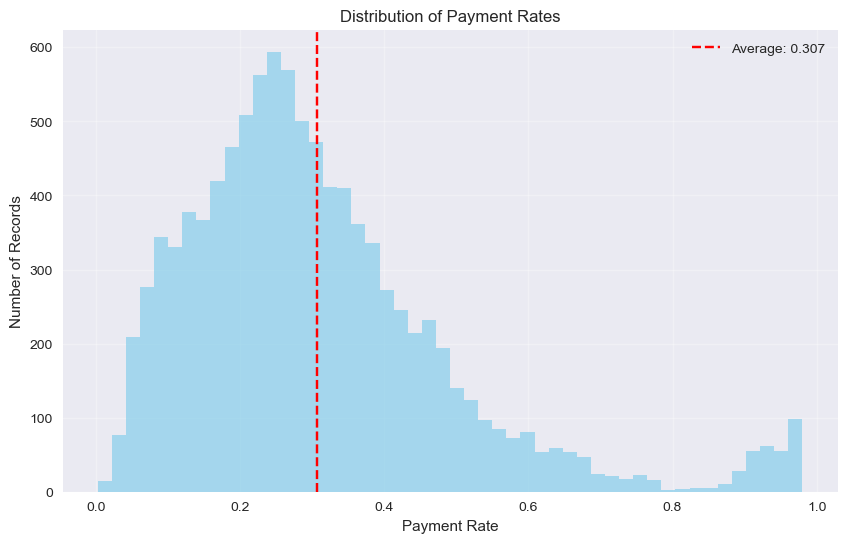

In [426]:
# Chart 1: Payment Rate Distribution
plt.figure(figsize=(10, 6))
plt.hist(df_with_metrics['Payment_Rate'], bins=50, color='skyblue', alpha=0.7)
plt.axvline(df_with_metrics['Payment_Rate'].mean(), color='red', linestyle='--', 
            label=f'Average: {df_with_metrics["Payment_Rate"].mean():.3f}')
plt.title('Distribution of Payment Rates')
plt.xlabel('Payment Rate')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

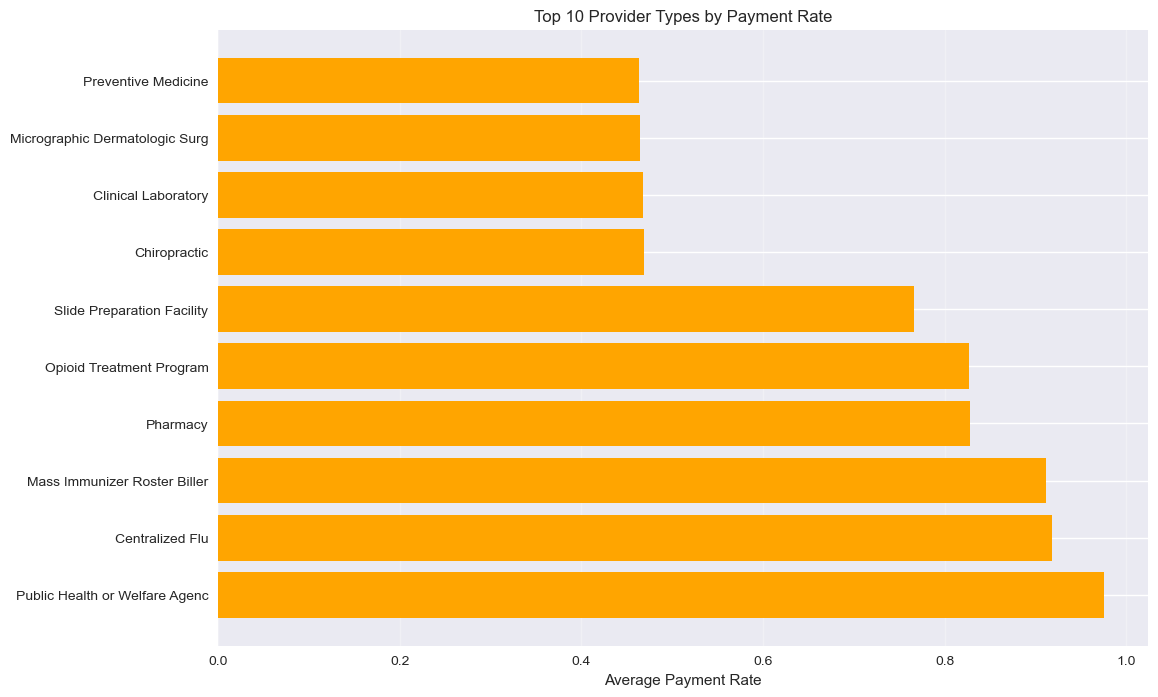

In [428]:
# Chart 2: Top Provider Types
top_providers = df_with_metrics.groupby('Rndrng_Prvdr_Type')['Payment_Rate'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_providers)), top_providers.values, color='orange')
plt.yticks(range(len(top_providers)), [name[:30] for name in top_providers.index])
plt.xlabel('Average Payment Rate')
plt.title('Top 10 Provider Types by Payment Rate')
plt.grid(axis='x', alpha=0.3)
plt.show()

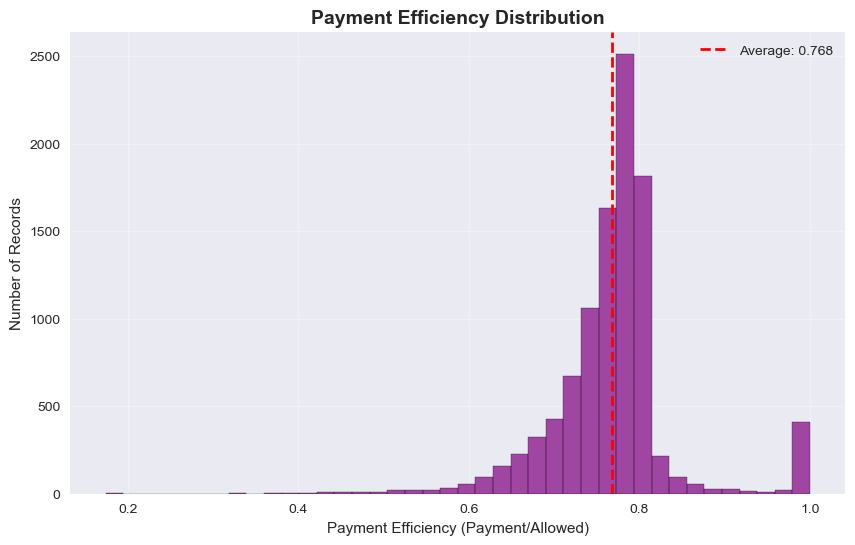

In [436]:
# Payment Efficiency Histogram
plt.figure(figsize=(10, 6))
plt.hist(df_with_metrics['Payment_Efficiency'], bins=40, color='purple', alpha=0.7, edgecolor='black')
plt.axvline(df_with_metrics['Payment_Efficiency'].mean(), color='red', linestyle='--', linewidth=2,
            label=f'Average: {df_with_metrics["Payment_Efficiency"].mean():.3f}')
plt.title('Payment Efficiency Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Payment Efficiency (Payment/Allowed)')
plt.ylabel('Number of Records')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

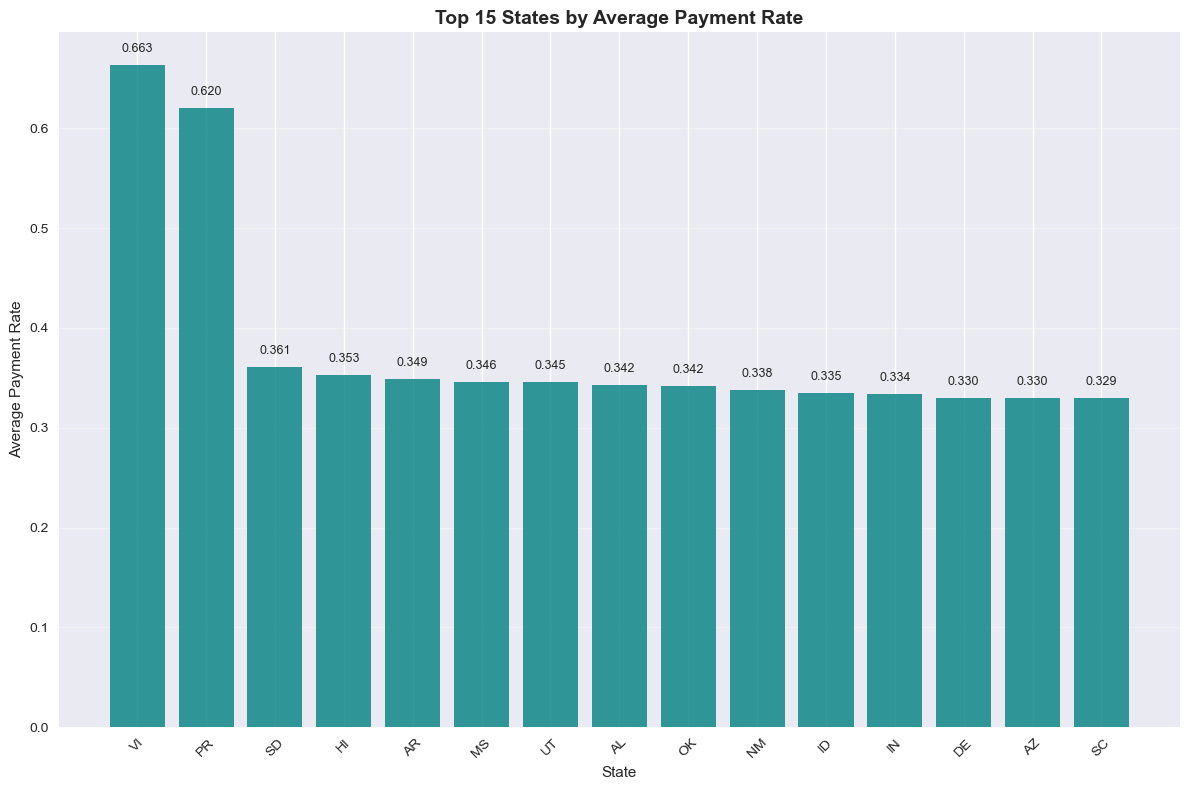

In [438]:
#Geographic Analysis - State Performance
# Top states by average payment rate
state_performance = df_with_metrics.groupby('Rndrng_Prvdr_State_Abrvtn').agg({
    'Payment_Rate': 'mean',
    'Tot_Mdcr_Pymt_Amt': 'sum'
}).sort_values('Payment_Rate', ascending=False).head(15)

plt.figure(figsize=(12, 8))
bars = plt.bar(range(len(state_performance)), state_performance['Payment_Rate'], color='teal', alpha=0.8)
plt.xticks(range(len(state_performance)), state_performance.index, rotation=45)
plt.title('Top 15 States by Average Payment Rate', fontsize=14, fontweight='bold')
plt.xlabel('State')
plt.ylabel('Average Payment Rate')
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.3f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

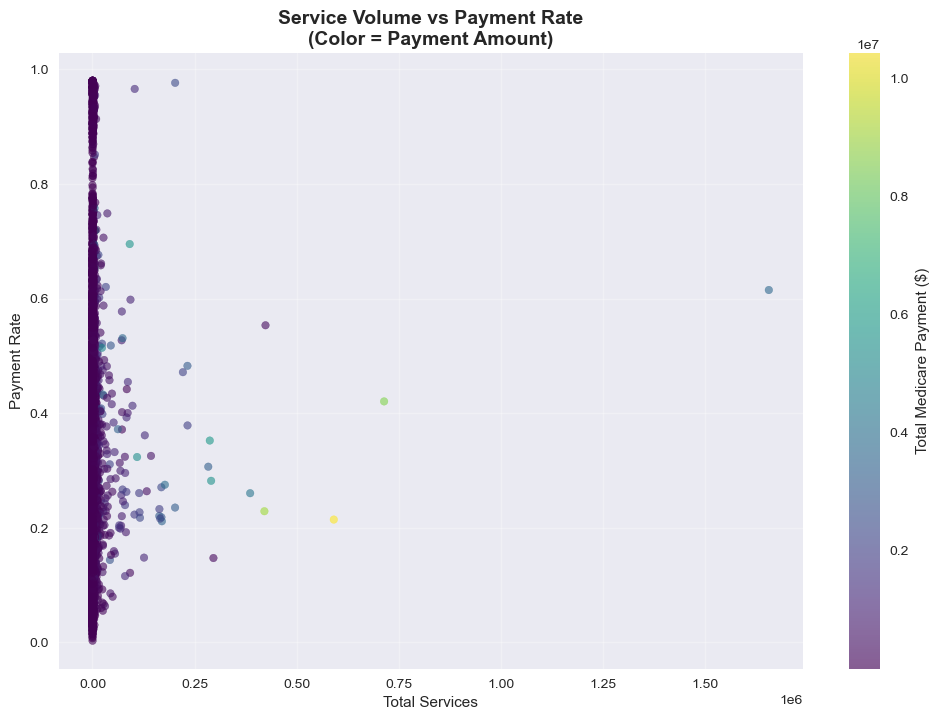

In [440]:
#Service Volume vs Payment Analysis
# Scatter plot: Services vs Payment Rate
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_with_metrics['Tot_Srvcs'], df_with_metrics['Payment_Rate'], 
                     c=df_with_metrics['Tot_Mdcr_Pymt_Amt'], cmap='viridis', 
                     alpha=0.6, s=30)
plt.colorbar(scatter, label='Total Medicare Payment ($)')
plt.xlabel('Total Services')
plt.ylabel('Payment Rate')
plt.title('Service Volume vs Payment Rate\n(Color = Payment Amount)', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.show()

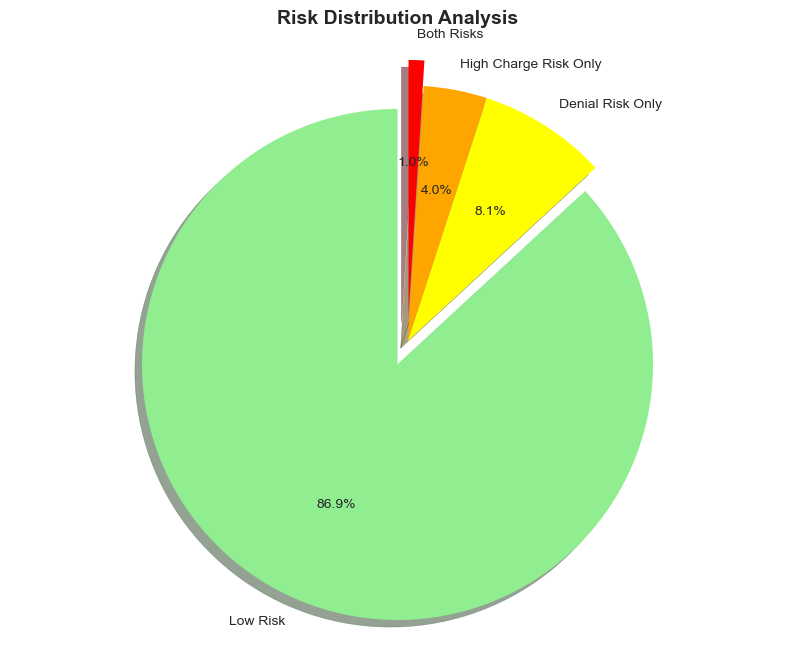

In [442]:
#Risk Analysis Pie Chart
# Risk categories
low_risk = len(df_with_metrics[(df_with_metrics['Potential_Denial'] == 0) & 
                               (df_with_metrics['High_Charge_Variance'] == 0)])
denial_risk = len(df_with_metrics[(df_with_metrics['Potential_Denial'] == 1) & 
                                  (df_with_metrics['High_Charge_Variance'] == 0)])
charge_risk = len(df_with_metrics[(df_with_metrics['Potential_Denial'] == 0) & 
                                  (df_with_metrics['High_Charge_Variance'] == 1)])
both_risks = len(df_with_metrics[(df_with_metrics['Potential_Denial'] == 1) & 
                                 (df_with_metrics['High_Charge_Variance'] == 1)])

plt.figure(figsize=(10, 8))
sizes = [low_risk, denial_risk, charge_risk, both_risks]
labels = ['Low Risk', 'Denial Risk Only', 'High Charge Risk Only', 'Both Risks']
colors = ['lightgreen', 'yellow', 'orange', 'red']
explode = (0.1, 0, 0, 0.1)  # explode low risk and both risks

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title('Risk Distribution Analysis', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

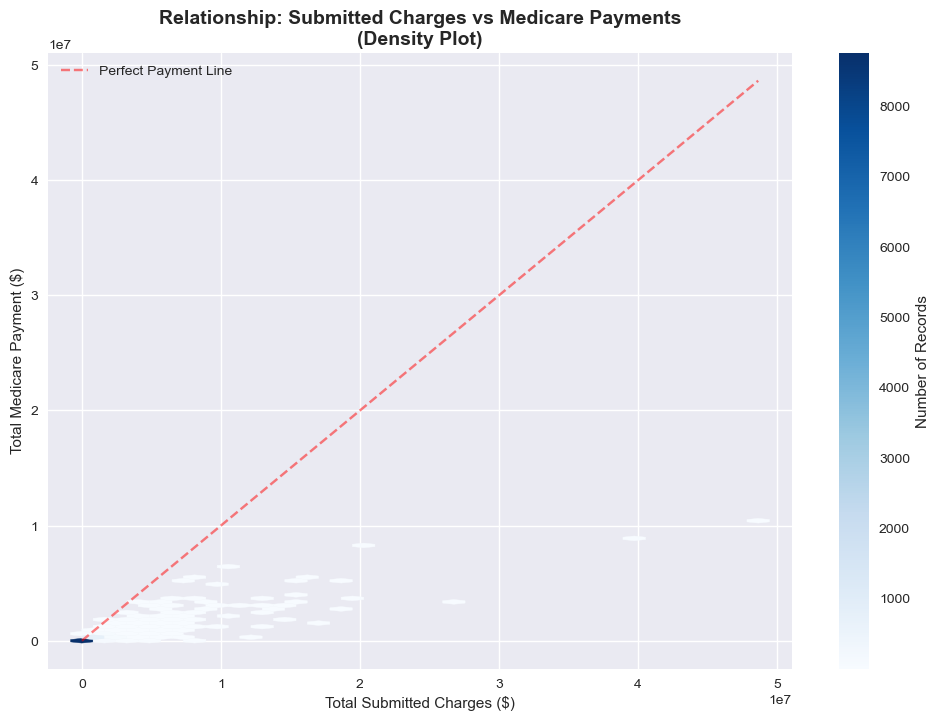

In [444]:
#Charge vs Payment Relationship
# Hexbin plot for better visualization of dense data
plt.figure(figsize=(12, 8))
plt.hexbin(df_with_metrics['Tot_Sbmtd_Chrg'], df_with_metrics['Tot_Mdcr_Pymt_Amt'], 
           gridsize=30, cmap='Blues', mincnt=1)
plt.colorbar(label='Number of Records')
plt.xlabel('Total Submitted Charges ($)')
plt.ylabel('Total Medicare Payment ($)')
plt.title('Relationship: Submitted Charges vs Medicare Payments\n(Density Plot)', 
          fontsize=14, fontweight='bold')

# Add diagonal line for reference
max_val = max(df_with_metrics['Tot_Sbmtd_Chrg'].max(), df_with_metrics['Tot_Mdcr_Pymt_Amt'].max())
plt.plot([0, max_val], [0, max_val], 'r--', alpha=0.5, label='Perfect Payment Line')
plt.legend()
plt.show()

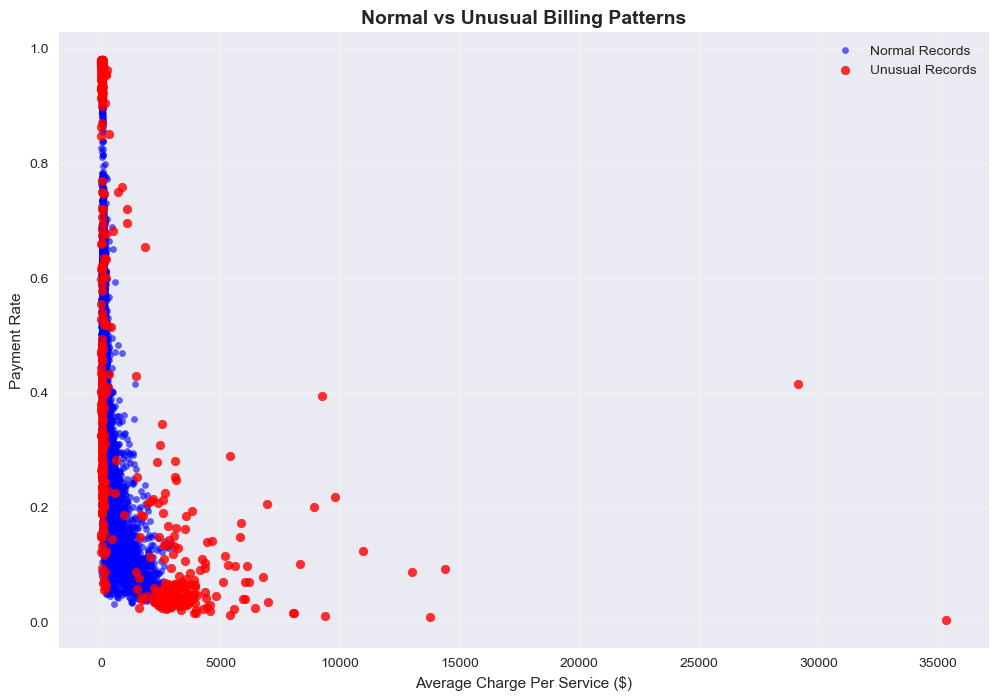

In [452]:
#Anomaly Detection Visualization
if 'Is_Unusual' in df_with_metrics.columns:
    plt.figure(figsize=(12, 8))
    
    normal_data = df_with_metrics[df_with_metrics['Is_Unusual'] == 0]
    anomaly_data = df_with_metrics[df_with_metrics['Is_Unusual'] == 1]
    
    plt.scatter(normal_data['Avg_Charge_Per_Service'], normal_data['Payment_Rate'], 
                alpha=0.6, color='blue', s=20, label='Normal Records')
    plt.scatter(anomaly_data['Avg_Charge_Per_Service'], anomaly_data['Payment_Rate'], 
                alpha=0.8, color='red', s=40, label='Unusual Records')
    
    plt.xlabel('Average Charge Per Service ($)')
    plt.ylabel('Payment Rate')
    plt.title('Normal vs Unusual Billing Patterns', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("Run anomaly detection first to create this chart")

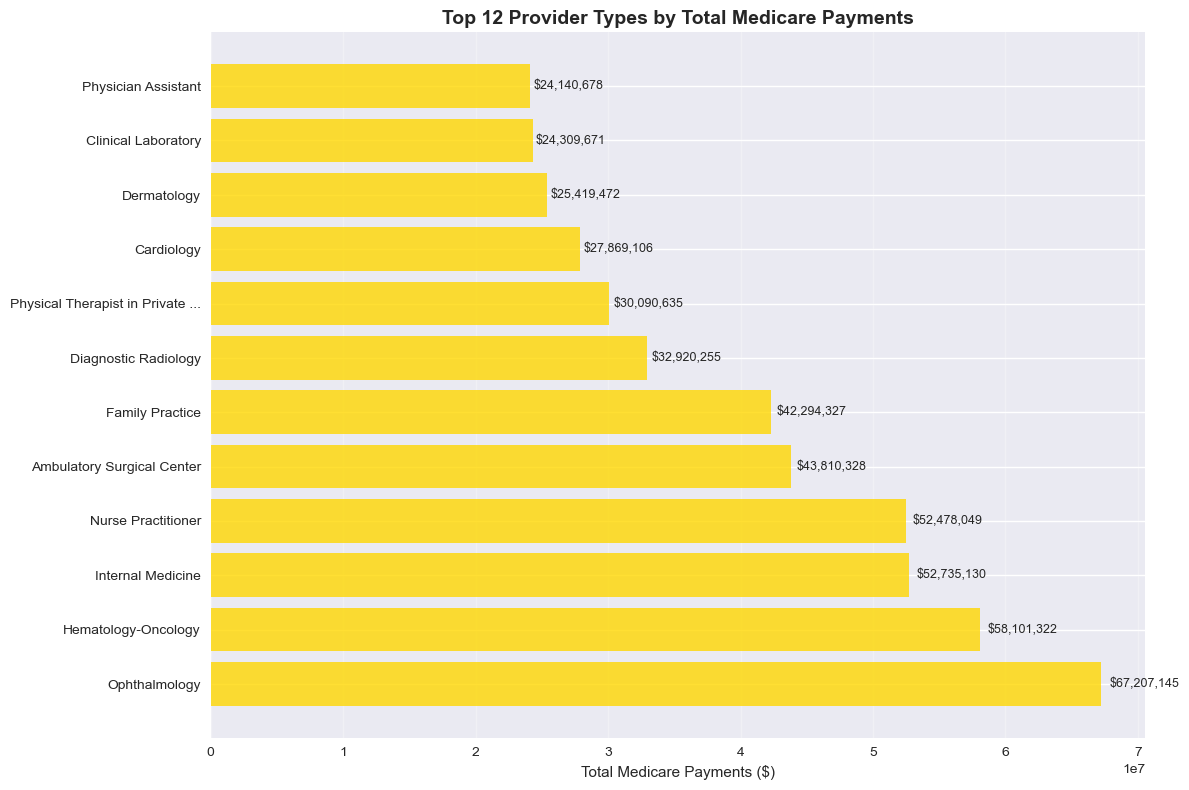

In [454]:
#Top Earning Providers
# Top providers by total Medicare payments
top_earners = df_with_metrics.groupby('Rndrng_Prvdr_Type')['Tot_Mdcr_Pymt_Amt'].sum().sort_values(ascending=False).head(12)

plt.figure(figsize=(12, 8))
bars = plt.barh(range(len(top_earners)), top_earners.values, color='gold', alpha=0.8)
plt.yticks(range(len(top_earners)), [name[:30] + '...' if len(name) > 30 else name 
                                     for name in top_earners.index])
plt.xlabel('Total Medicare Payments ($)')
plt.title('Top 12 Provider Types by Total Medicare Payments', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, (bar, value) in enumerate(zip(bars, top_earners.values)):
    plt.text(value + value*0.01, bar.get_y() + bar.get_height()/2.,
             f'${value:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

In [462]:
df.to_csv('RCM_Analysis_Cleaned.csv', index=False)